# WNS Analytics Wizard 2019

## 1.0 Getting Started

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# setting the path
os.chdir("/content/gdrive/My Drive/Colab Notebooks/WNS")

In [0]:
# Importing the dataset
Train = pd.read_csv("./Input/train_NA17Sgz/train.csv")
Item = pd.read_csv("./Input/train_NA17Sgz/item_data.csv")
View = pd.read_csv("./Input/train_NA17Sgz/view_log.csv")
Test = pd.read_csv("./Input/test_aq1FGdB/test.csv")
Sample_submission = pd.read_csv("./Input/sample_submission_IPsBlCT/sample_submission.csv")

## 2.0 Glimpse of data

In [5]:
# Shape of data
print("Number of rows and columns in train dataset:",Train.shape)
print("Number of rows and columns in test dataset:",Test.shape)

print("Number of rows and columns in Item dataset:",Item.shape)
print("Number of rows and columns in View dataset:",View.shape)

Number of rows and columns in train dataset: (237609, 7)
Number of rows and columns in test dataset: (90675, 6)
Number of rows and columns in Item dataset: (132761, 6)
Number of rows and columns in View dataset: (3118622, 5)


In [6]:
# Variable structure
print("-----------------Variable Structure of training data--------------")
Train.info()
print("-----------------Variable Structure of test data------------------")
Test.info()

print("-----------------Variable Structure of item data--------------")
Item.info()
print("-----------------Variable Structure of view data------------------")
View.info()

-----------------Variable Structure of training data--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237609 entries, 0 to 237608
Data columns (total 7 columns):
impression_id      237609 non-null object
impression_time    237609 non-null object
user_id            237609 non-null int64
app_code           237609 non-null int64
os_version         237609 non-null object
is_4G              237609 non-null int64
is_click           237609 non-null int64
dtypes: int64(4), object(3)
memory usage: 12.7+ MB
-----------------Variable Structure of test data------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90675 entries, 0 to 90674
Data columns (total 6 columns):
impression_id      90675 non-null object
impression_time    90675 non-null object
user_id            90675 non-null int64
app_code           90675 non-null int64
os_version         90675 non-null object
is_4G              90675 non-null int64
dtypes: int64(3), object(3)
memory usage: 4.2+ MB
--------------

In [7]:
Train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


## 3.0 EDA

In [8]:
# Merging Product data into log data
View_log = pd.merge(View,Item,on='item_id',how='left')
View_log.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0
2,2018-10-15 08:58:00,android,573960,23628,128855,4544.0,4.0,38.0,62.0,5609.0
3,2018-10-15 08:58:00,android,121691,2430,12774,904.0,17.0,39.0,252.0,2740.0
4,2018-10-15 08:58:00,android,218564,19227,28296,2304.0,12.0,57.0,54.0,7422.0


In [9]:
# Checking Missing values
print("Total missing value:", View_log.isnull().sum().sum())
print("% missing value:", View_log.isnull().sum().sum()/View_log.shape[0])
print("Missing value by variable wise:")
View_log.isnull().sum()

Total missing value: 8910
% missing value: 0.0028570310861656205
Missing value by variable wise:


server_time        0
device_type        0
session_id         0
user_id            0
item_id            0
item_price      1782
category_1      1782
category_2      1782
category_3      1782
product_type    1782
dtype: int64

In [10]:
# Removing Missing value
View_log = View_log.dropna()

print("Total missing value:", View_log.isnull().sum().sum())
print("% missing value:", View_log.isnull().sum().sum()/View_log.shape[0])


Total missing value: 0
% missing value: 0.0


## 4.0 Machine learning

### 4.1 Data Pre-processing

count    74723.000000
mean         3.179864
std          4.649940
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         73.000000
Name: user_id_count, dtype: float64
3.Low       34093
2.Medium    23783
1.High      16847
Name: User_type, dtype: int64
   user_id User_type
0    71457    1.High
1    29947    1.High
2    59007    1.High
3    52082    1.High
4    68540    1.High


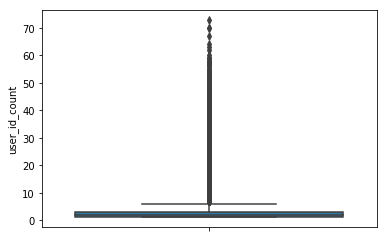

In [11]:
# Feature enginearing: User Id
user_id_count = pd.DataFrame(Train['user_id'].value_counts())
user_id_count =user_id_count.reset_index()
user_id_count.columns = ['user_id','user_id_count']
print(user_id_count['user_id_count'].describe())
sns.boxplot(y = user_id_count['user_id_count']);

user_id_count['User_type'] = np.where(user_id_count['user_id_count'] > 3 , "1.High",
                                      np.where(user_id_count['user_id_count'] >= 2 , "2.Medium", "3.Low"))

print(user_id_count['User_type'].value_counts())

user_id_count = user_id_count[['user_id', 'User_type']]

print(user_id_count.head())

count      490.000000
mean       484.916327
std       2472.161247
min          1.000000
25%          2.000000
50%         13.000000
75%         89.250000
max      33788.000000
Name: app_code_count, dtype: float64
3.Low        158
2.Medium     125
1.High       123
4.VeryLow     84
Name: app_code_type, dtype: int64
   app_code app_code_type
0       207        1.High
1       386        1.High
2       190        1.High
3       127        1.High
4       371        1.High


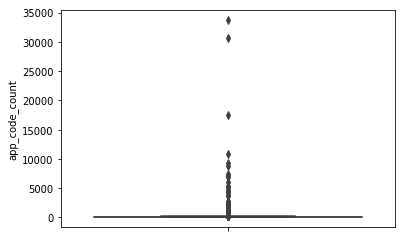

In [12]:
# Feature enginearing: app code
app_code_count = pd.DataFrame(Train['app_code'].value_counts())
app_code_count = app_code_count.reset_index()
app_code_count.columns = ['app_code','app_code_count']
print(app_code_count['app_code_count'].describe())
sns.boxplot(y = app_code_count['app_code_count']);

app_code_count['app_code_type'] = np.where(app_code_count['app_code_count'] > 89.25 , "1.High",
                                      np.where(app_code_count['app_code_count'] >= 13 , "2.Medium", 
                                               np.where(app_code_count['app_code_count'] >= 2 , "3.Low", "4.VeryLow")))
print(app_code_count['app_code_type'].value_counts())

app_code_count = app_code_count[['app_code', 'app_code_type']]

print(app_code_count.head())

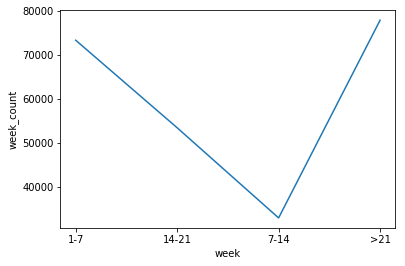

In [13]:
# Feature enginearing: day
Train["impression_time"]= pd.to_datetime(Train["impression_time"])
Train['day'] = Train['impression_time'].dt.day.astype('object')
Train['Week'] = np.where(Train['day'] > 21 , ">21",
                                      np.where(Train['day'] > 14 , "14-21", 
                                               np.where(Train['day'] > 7 , "7-14", "1-7")))
week_count = pd.DataFrame(Train['Week'].value_counts())
week_count = week_count.reset_index()
week_count.columns = ['week','week_count']
sns.lineplot(x="week", y="week_count", data=week_count);

In [0]:
# Function for Feature engineering
def Feature_eng(Train, user_id_count, app_code_count):
  
  Train = pd.merge(Train,user_id_count,on='user_id',how='left')
  Train['User_type'] = np.where(pd.isnull(Train['User_type']),'3.Low',Train['User_type'])
  Train = pd.merge(Train,app_code_count,on='app_code',how='left')
  Train['app_code_type'] = np.where(pd.isnull(Train['app_code_type']),'4.VeryLow',Train['app_code_type'])
  Train["impression_time"]= pd.to_datetime(Train["impression_time"])
  Train['day'] = Train['impression_time'].dt.day.astype('object')
  Train['Week'] = np.where(Train['day'] > 21 , ">21",
                                      np.where(Train['day'] > 14 , "14-21", 
                                               np.where(Train['day'] > 7 , "7-14", "1-7")))
  Train['hour'] = Train['impression_time'].dt.hour.astype('object')
  Train['app_code'] = Train['app_code'].astype('object')
  Train_temp = pd.get_dummies(Train[["User_type","app_code_type", "os_version","Week","hour"]], prefix=['User_type','app_code_type','os_version','Week', 'hour'])
  Train = pd.concat([Train,Train_temp], axis =1)
  Train_v2 = Train.drop(columns=['impression_id','impression_time','user_id','app_code','os_version','day', 'Week','hour', 'User_type', 'app_code_type'])
  return Train_v2

In [15]:
# Calling Feature engineering function
Train_v2 = Feature_eng(Train, user_id_count, app_code_count)
Test_v2 = Feature_eng(Test, user_id_count, app_code_count)

print("Number of rows and variables in train data:", Train_v2.shape)
print("Number of rows and variables in test data:", Test_v2.shape)

Test_v2['Week_1-7'] = 0
Test_v2['Week_>21'] = 0

print("Number of rows and variables in train data:", Train_v2.shape)
print("Number of rows and variables in test data:", Test_v2.shape)


Number of rows and variables in train data: (237609, 40)
Number of rows and variables in test data: (90675, 37)
Number of rows and variables in train data: (237609, 40)
Number of rows and variables in test data: (90675, 39)


In [16]:
# Distribution of target variable
print("The unique number of Categories: ",len(Train_v2['is_click'].unique()))
print("Below are the distribution of each categories in Train data:")
Train_v2['is_click'].value_counts(normalize = True)

The unique number of Categories:  2
Below are the distribution of each categories in Train data:


0    0.954286
1    0.045714
Name: is_click, dtype: float64

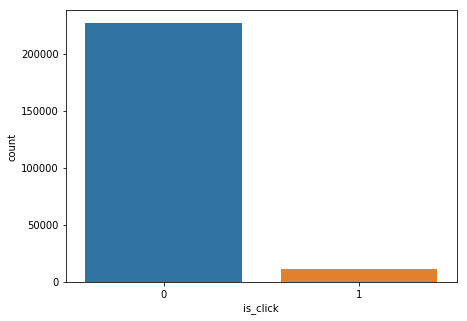

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'is_click', data = Train_v2);

### 4.2 Splitting into X and y

In [0]:
# Splitting into X and y
X = Train_v2.drop(columns=['is_click'])
y = Train_v2['is_click']

### 4.3 Dividing data into train and validation set

Before training the model, let's split the training data into a training and validation set.

In [19]:
# Dividing data into train and validation set
from sklearn.model_selection import train_test_split

validation_percent = 0.30
test_percent = 0.50
seed = 786

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = validation_percent, random_state = seed, stratify = y)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size = test_percent, random_state = seed, stratify = y_validation)

# Shape of data
print("Number of rows and columns in train dataset:",X_train.shape)
print("Number of rows and columns in validation dataset:",X_validation.shape)
print("Number of rows and columns in test dataset:",X_test.shape)

print("Number of rows and columns in target variable for training:",y_train.shape)
print("Number of rows and columns in target variable for validation:",y_validation.shape)
print("Number of rows and columns in target variable for test:",y_test.shape)

Number of rows and columns in train dataset: (166326, 39)
Number of rows and columns in validation dataset: (35641, 39)
Number of rows and columns in test dataset: (35642, 39)
Number of rows and columns in target variable for training: (166326,)
Number of rows and columns in target variable for validation: (35641,)
Number of rows and columns in target variable for test: (35642,)


### 4.4 Checking various models

In [20]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

seed = 786
LR = LogisticRegression(penalty='l2', class_weight = 'balanced', random_state=seed,C=100)

model_LR = LR.fit(X_train, y_train)

# Scoring based on F1 score for hold out sample
prob1=model_LR.predict_proba(X_validation)[:,1]
y_predict_LR=[1 if i > 0.57 else 0 for i in prob1]
#y_predict_LR = model_LR.predict(X_validation)

from sklearn.metrics import roc_auc_score, f1_score, classification_report
F1_scores_holdout = f1_score(y_validation, y_predict_LR, average="macro")
AUC_scores_holdout = roc_auc_score(y_validation, y_predict_LR)
print(classification_report(y_validation, y_predict_LR))
print("F1 Score for hold-out sample data:", round(F1_scores_holdout*100,2))
print("AUC Score for hold-out sample data:", round(AUC_scores_holdout*100,2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     34012
           1       0.07      0.06      0.06      1629

    accuracy                           0.92     35641
   macro avg       0.51      0.51      0.51     35641
weighted avg       0.91      0.92      0.92     35641

F1 Score for hold-out sample data: 51.06
AUC Score for hold-out sample data: 51.03


In [21]:
# Scoring based on F1 score for test sample
prob1=model_LR.predict_proba(X_test)[:,1]
y_predict_LR=[1 if i > 0.57 else 0 for i in prob1]
#y_predict_LR = model_LR.predict(X_validation)

from sklearn.metrics import roc_auc_score, f1_score, classification_report
F1_scores_holdout = f1_score(y_test, y_predict_LR, average="macro")
AUC_scores_holdout = roc_auc_score(y_test, y_predict_LR)
print(classification_report(y_test, y_predict_LR))
print("F1 Score for hold-out sample data:", round(F1_scores_holdout*100,2))
print("AUC Score for hold-out sample data:", round(AUC_scores_holdout*100,2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     34012
           1       0.05      0.05      0.05      1630

    accuracy                           0.92     35642
   macro avg       0.50      0.50      0.50     35642
weighted avg       0.91      0.92      0.92     35642

F1 Score for hold-out sample data: 50.29
AUC Score for hold-out sample data: 50.28


In [22]:
# Predicting test output
#y_predict = model_LR.predict(Test_v2)
prob1=model_LR.predict_proba(Test_v2)[:,1]
y_predict=[1 if i > 0.57 else 0 for i in prob1]
Submission = pd.DataFrame()
Submission['impression_id'] = Test['impression_id']
Submission['is_click'] = y_predict
Submission.head()
Submission['is_click'].value_counts()

0    85750
1     4925
Name: is_click, dtype: int64

In [0]:
# Exporting output
Submission.to_csv("./Output/Output_v1.csv", index = False)